In [1]:
from IBLGF import *

In [17]:
nx = 400
ny = 200
dx = 0.075
dy = 0.05
v = sol(dx, dy, 0.5, 1e-5, nx, ny, int(nx/4), int(ny/2), Re = 20)

/Users/weihou/anaconda3/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:611: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/Users/weihou/anaconda3/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:611: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/Users/weihou/anaconda3/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:611: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/Users/weihou/anaconda3/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:611: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/Users/weihou/anaconda3/lib/python3.11/site-pack

In [18]:

resmat = np.zeros((2*ny, 2*nx))
np.isnan(v.LGF).any()
for i in range(1,2*ny):
    for j in range(1,2*nx):
        res = 2/dx/dx*v.LGF[i,j] - v.LGF[i,j - 1]/dx/dx - v.LGF[i,j + 1]/dx/dx + 2/dy/dy*v.LGF[i,j] - v.LGF[i - 1,j]/dy/dy - v.LGF[i + 1,j]/dy/dy
        res *= dx * dx
        resmat[i,j] = res
        if abs(res) > 0.1:
            print(res)
            print(i,j)

-0.9999999999999996
200 400


In [9]:
v.LGF

array([[1.27133148, 1.27093549, 1.2705397 , ..., 1.2705397 , 1.27093549,
        1.27133148],
       [1.2708521 , 1.27045393, 1.27005595, ..., 1.27005595, 1.27045393,
        1.2708521 ],
       [1.27037251, 1.26997215, 1.26957197, ..., 1.26957197, 1.26997215,
        1.27037251],
       ...,
       [1.27037251, 1.26997215, 1.26957197, ..., 1.26957197, 1.26997215,
        1.27037251],
       [1.2708521 , 1.27045393, 1.27005595, ..., 1.27005595, 1.27045393,
        1.2708521 ],
       [1.27133148, 1.27093549, 1.2705397 , ..., 1.2705397 , 1.27093549,
        1.27133148]])

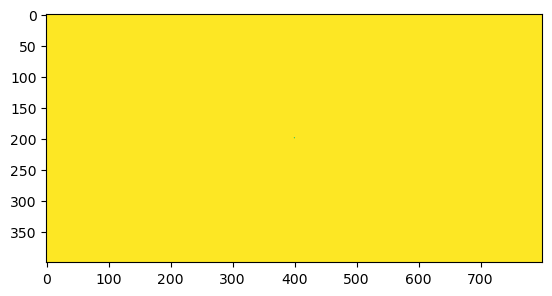

In [19]:
plt.imshow(resmat/dx/dx)

In [9]:
v.coeff_a[2,2]

2.0

In [20]:
#v.use_direct_solve = False
v.time_march(500)

Total IB force:  [5.43399707e+00 5.63940581e-05]
step  0
Total IB force:  [5.49837516e+00 1.27750406e-04]
step  1
Total IB force:  [5.60199169e+00 2.05550639e-05]
step  2
Total IB force:  [ 5.69381099e+00 -1.57413744e-04]
step  3
Total IB force:  [ 5.77615149e+00 -4.21601678e-04]
step  4
Total IB force:  [ 5.85166371e+00 -7.93114490e-04]
step  5
Total IB force:  [ 5.92203647e+00 -1.29214513e-03]
step  6
Total IB force:  [ 5.98839220e+00 -1.93805163e-03]
step  7
Total IB force:  [ 6.05152657e+00 -2.74933490e-03]
step  8
Total IB force:  [ 6.11203509e+00 -3.74346077e-03]
step  9
Total IB force:  [ 6.17038402e+00 -4.93665936e-03]
step  10
Total IB force:  [ 6.22695266 -0.00634375]
step  11
Total IB force:  [ 6.28205996 -0.00797797]
step  12
Total IB force:  [ 6.33598192 -0.00985091]
step  13
Total IB force:  [ 6.3889633  -0.01197234]
step  14
Total IB force:  [ 6.44122578 -0.01435022]
step  15
Total IB force:  [ 6.49297356 -0.01699061]
step  16
Total IB force:  [ 6.5443974  -0.01989766]
s

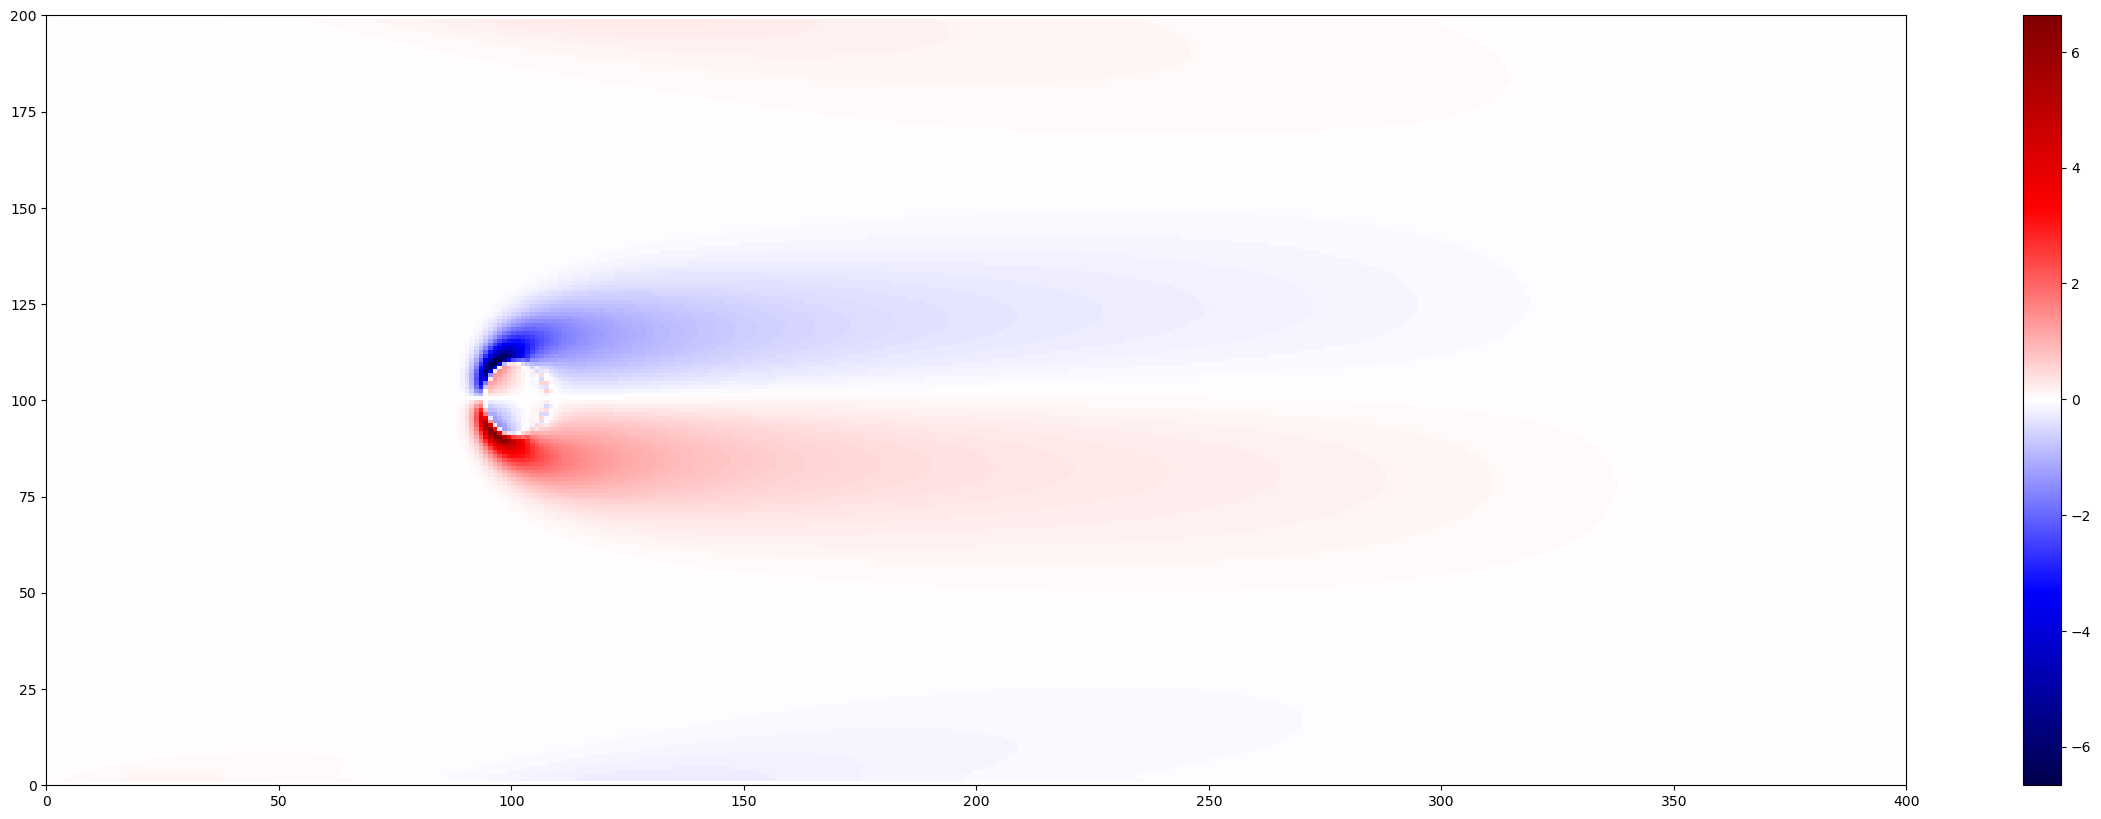

In [21]:
fig, axes = plt.subplots(figsize = (dx*nx, dy*ny))
axes.grid(False)
im = axes.pcolormesh(v.omega[0], cmap = 'seismic')

cbar = plt.colorbar(im)